In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

# Social, gender and study data from secondary school students


* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex - student's sex (binary: 'F' - female or 'M' - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* nursery - attended nursery school (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)



In [2]:
df = pd.read_csv('student-por.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Chybejici hodnoty

In [3]:
df.isna().sum().sort_values(ascending=False)

school        0
paid          0
G2            0
G1            0
absences      0
health        0
Walc          0
Dalc          0
goout         0
freetime      0
famrel        0
romantic      0
internet      0
higher        0
nursery       0
activities    0
famsup        0
sex           0
schoolsup     0
failures      0
studytime     0
traveltime    0
guardian      0
reason        0
Fjob          0
Mjob          0
Fedu          0
Medu          0
Pstatus       0
famsize       0
address       0
age           0
G3            0
dtype: int64

In [4]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

### Numericka data

In [5]:
df.describe(include=np.number)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### Kategoricka data

In [6]:
df.describe(exclude=np.number)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,423,383,452,457,569,258,367,285,455,581,398,610,334,521,580,498,410


In [7]:
df.age.value_counts()

17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64

In [8]:
df.Fedu.value_counts()

2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64

## Data Preprocesing
Budeme chtit zpracovavat sloupce u kterych ma rozdeleni do clusteru smysl. V nasem pripade se zde nenachazi nejake jedinecne hodnoty, ktere by byly pro kazdy zaznam jine, jako napr. jmeno studenta. Vsechny atributy se daji pouzit pro rozdeleni do skupin, takze se zadnych nebudeme zbavovat. Samozrejme by jsme se mohli zbavit tech co nas nezajimaji nebo nam neprijdou relevantni, ale v tomto pripade uz ze zvedavosti to nechame jak to je a budeme se soustredit na spravny preprocesing dat.

In [9]:
df_encoded = pd.DataFrame(index = df.index)


### Zacneme enkodovanim kategorickych dat

Prvne na binarni data

In [10]:
df_encoded['school'] = sklearn.preprocessing.OrdinalEncoder().fit_transform(df[['school']])
df_encoded['sex'] = sklearn.preprocessing.OrdinalEncoder().fit_transform(df[['sex']])
df_encoded['address'] = sklearn.preprocessing.OrdinalEncoder().fit_transform(df[['address']])
df_encoded['famsize'] = sklearn.preprocessing.OrdinalEncoder().fit_transform(df[['famsize']])
df_encoded['Pstatus'] = sklearn.preprocessing.OrdinalEncoder().fit_transform(df[['Pstatus']])
df_encoded['schoolsup'] = sklearn.preprocessing.OrdinalEncoder().fit_transform(df[['schoolsup']])
df_encoded['famsup'] = sklearn.preprocessing.OrdinalEncoder().fit_transform(df[['famsup']])
df_encoded['paid'] = sklearn.preprocessing.OrdinalEncoder().fit_transform(df[['paid']])
df_encoded['activities'] = sklearn.preprocessing.OrdinalEncoder().fit_transform(df[['activities']])
df_encoded['nursery'] = sklearn.preprocessing.OrdinalEncoder().fit_transform(df[['nursery']])
df_encoded['higher'] = sklearn.preprocessing.OrdinalEncoder().fit_transform(df[['higher']])
df_encoded['internet'] = sklearn.preprocessing.OrdinalEncoder().fit_transform(df[['internet']])
df_encoded['romantic'] = sklearn.preprocessing.OrdinalEncoder().fit_transform(df[['romantic']])
df_encoded.head()

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


Dale kategoricka data u kteruch nam nezalezi na vzdalenosti, takze je prevedeme dummies.

In [11]:
df_encoded = df_encoded.join(pd.get_dummies(df[['Mjob']]))
df_encoded = df_encoded.join(pd.get_dummies(df[['Fjob']]))
df_encoded = df_encoded.join(pd.get_dummies(df[['reason']]))
df_encoded = df_encoded.join(pd.get_dummies(df[['guardian']]))
df_encoded.head()

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,1,1,0,0,0,0,1,0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0
2,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,1,0,0,1,0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,1,0,0,1,0,0,0,1,0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,0,0,0,1,0,0,1,0,0


Ted bude potreba dobre skalovat ciselna data
Atributy: Medu	Fedu	traveltime	studytime	failures	famrel	freetime	goout	Dalc	Walc	health, by se dali povazovat za kategoricke protoze nabyvaji hodnot v urcitem intervalu a znaci tim napr.: jak moc. Takze ted je otazka jestli je skalovat nebo z nich udelat dummies. Respektive nechat nektere tak jak jsou, protoze u nich lze reprezentovat vzdalenost.

Dalsi hodnoty jako age, absence, G1, G2, G3 se budou muset skalovat. 

<AxesSubplot:>

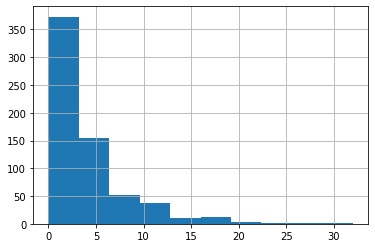

In [75]:
df.absences.hist()

<AxesSubplot:>

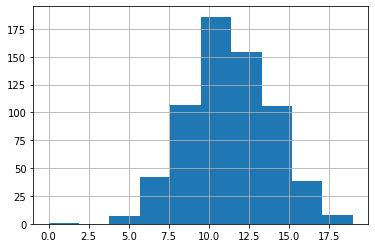

In [77]:
df.G1.hist()

Prvni se vyporadame s daty ktera jsou potreva skalovat.

In [76]:

df_encoded['age'] = sklearn.preprocessing.minmax_scale(df.age)
df_encoded['absences'] = sklearn.preprocessing.minmax_scale(df.absences)
df_encoded['G1'] = sklearn.preprocessing.minmax_scale(df.G1)
df_encoded['G2'] = sklearn.preprocessing.minmax_scale(df.G2)
df_encoded['G3'] = sklearn.preprocessing.minmax_scale(df.G3)
df_encoded.head()

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,...,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,age,absences,G1,G2,G3
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0.428571,0.1250,0.000000,0.578947,0.578947
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0.285714,0.0625,0.473684,0.578947,0.578947
2,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1,0,0,1,0,0.000000,0.1875,0.631579,0.684211,0.631579
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,1,0,0.000000,0.0000,0.736842,0.736842,0.736842
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,0,0,0.142857,0.0000,0.578947,0.684211,0.684211


<AxesSubplot:>

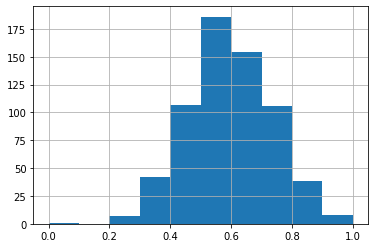

In [78]:
df_encoded.G1.hist()

Nasledne zbytek, ten nechame tak jak je, protoze hodnoty znaci jak moc a vzdalenosti maji mezi sebou vyznam.

In [84]:
# Medu	Fedu	traveltime	studytime	failures	famrel	freetime	goout	Dalc	Walc	health
df_encoded = df_encoded.join(df[['Medu',	'Fedu',	'traveltime', 'studytime',
                             'failures',	'famrel',	'freetime',	'goout',	'Dalc',	'Walc',	'health']])
df_encoded.head()


,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,...,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,4,2,2,0,4,3,4,1,1,3
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,1,2,0,5,3,3,1,1,3
2,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1,1,2,0,4,3,2,2,3,3
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2,1,3,0,3,2,2,1,1,5
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3,1,2,0,4,3,2,1,2,5


In [86]:
df_encoded.describe()

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,...,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.348228,0.409861,0.696456,0.295840,0.876733,0.104777,0.613251,0.060092,0.485362,0.802773,...,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210
std,0.476776,0.492187,0.460143,0.456771,0.328996,0.306502,0.487381,0.237841,0.500171,0.398212,...,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Clustering
Zacneme s elbow metodou, pro zjisteni vhodneho poctu clusteru.


In [89]:
X = df_encoded.values

<AxesSubplot:xlabel='k'>

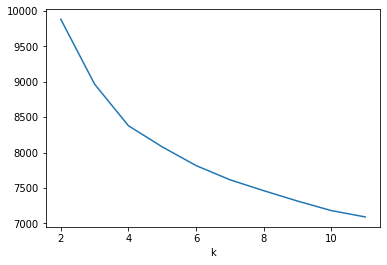

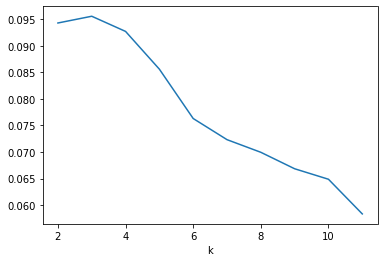

In [99]:
clustering_scores = []
for k in range(2, 12):
    clustering = sklearn.cluster.KMeans(n_clusters=k).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')
df_clustering_scores.sse.plot()
plt.figure()
df_clustering_scores.silhouette.plot()

Zvolime 4 clustery, protoze to tam vypada ze se to nejvice lame

In [100]:
clustering = sklearn.cluster.KMeans(n_clusters=4, random_state=42)
clustering.fit(X)

KMeans(n_clusters=4, random_state=42)

Velikost nasich clusteru

In [101]:
pd.Series(clustering.labels_).value_counts()

3    193
1    163
2    158
0    135
dtype: int64

Ted se podivame na vytvorene clustery

In [102]:
df['cluster_id'] = clustering.labels_
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cluster_id
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,3
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,3
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,2


In [104]:
with pd.option_context('display.max_columns', None):
    display(df.groupby('cluster_id').describe())

age                                                      Medu  \
            count       mean       std   min   25%   50%   75%   max  count   
cluster_id                                                                    
0           135.0  17.148148  1.266789  15.0  16.0  17.0  18.0  22.0  135.0   
1           163.0  16.656442  1.198664  15.0  16.0  17.0  18.0  20.0  163.0   
2           158.0  16.500000  1.198460  15.0  16.0  16.0  17.0  21.0  158.0   
3           193.0  16.735751  1.153625  15.0  16.0  17.0  18.0  20.0  193.0   

                                                          Fedu            \
                mean       std  min  25%  50%  75%  max  count      mean   
cluster_id                                                                 
0           2.148148  1.061669  0.0  1.0  2.0  3.0  4.0  135.0  2.088889   
1           2.754601  1.060468  0.0  2.0  3.0  4.0  4.0  163.0  2.453988   
2           3.588608  0.629728  1.0  3.0  4.0  4.0  4.0  158.0  3.329114   
3           1.689119  0.712051  0.0  1.0  2.0  2.0  4.0  193.0  1.497409   

                                              traveltime                      \
                 std  min  25%  50%  75%  max      count      mean       std   
cluster_id                                                                     
0           0.973275  1.0  1.0  2.0  3.0  4.0      135.0  1.792593  0.847263   
1           1.031614  0.0  2.0  2.0  3.0  4.0      163.0  1.515337  0.714539   
2           0.785563  1.0  3.0  4.0  4.0  4.0      158.0  1.284810  0.553987   
3           0.670233  0.0  1.0  1.0  2.0  4.0      193.0  1.689119  0.768342   

                                    studytime                                \
            min  25%  50%  75%  max     count      mean       std  min  25%   
cluster_id                                                                    
0           1.0  1.0  2.0  2.0  4.0     135.0  1.585185  0.766706  1.0  1.0   
1           1.0  1.0  1.0  2.0  4.0     163.0  2.042945  0.764568  1.0  2.0   
2           1.0  1.0  1.0  1.0  4.0     158.0  2.107595  0.826206  1.0  2.0   
3           1.0  1.0  2.0  2.0  4.0     193.0  1.932642  0.860367  1.0  1.0   

                          failures                                          \
            50%  75%  max    count      mean       std  min  25%  50%  75%   
cluster_id                                                                   
0           1.0  2.0  4.0    135.0  0.459259  0.826456  0.0  0.0  0.0  1.0   
1           2.0  2.0  4.0    163.0  0.141104  0.469795  0.0  0.0  0.0  0.0   
2           2.0  3.0  4.0    158.0  0.063291  0.351223  0.0  0.0  0.0  0.0   
3           2.0  2.0  4.0    193.0  0.253886  0.597563  0.0  0.0  0.0  0.0   

                famrel                                              freetime  \
            max  count      mean       std  min  25%  50%  75%  max    count   
cluster_id                                                                     
0           3.0  135.0  3.866667  0.975827  1.0  3.0  4.0  5.0  5.0    135.0   
1           3.0  163.0  3.766871  1.091892  1.0  3.0  4.0  4.5  5.0    163.0   
2           3.0  158.0  4.145570  0.755666  2.0  4.0  4.0  5.0  5.0    158.0   
3           3.0  193.0  3.937824  0.938899  1.0  4.0  4.0  5.0  5.0    193.0   

                                                         goout            \
                mean       std  min  25%  50%  75%  max  count      mean   
cluster_id                                                                 
0           3.696296  0.979446  1.0  3.0  4.0  4.0  5.0  135.0  4.133333   
1           3.024540  1.065456  1.0  2.0  3.0  4.0  5.0  163.0  3.226994   
2           3.240506  0.953908  1.0  3.0  3.0  4.0  5.0  158.0  2.930380   
3           2.901554  1.033626  1.0  2.0  3.0  4.0  5.0  193.0  2.694301   

                                                Dalc                           \
                 std  min  25%  50%  75%  max  count      mean       std  min   
cluster_i

* cluster id 2 ma v prumeru nejkratsi traveltime
* clustery 1,2,3 maji vyrazne vetsi studytime nez cluster 0
* cluster 2 ma nejvetsi uspesnost a cluster 0 nejmensi
* cluster 0 travi nejvice casu venku (goout) k tomu nejvice konzumuji alkohol jak pres tyden, tak o vikendu
* prekvapive nema cluster 0 nejhorsi zdravotni stav, ale dost podovny clusteru 2,3. Kazdopadne oprotio clusteru 1 jsou na tom ostatni dost spatne.
* v absenci je vitez cluster 0
* znamky nejsou zas tak rozdilne v poradi od nejlepsiho: 2,1,3,0 

In [105]:
with pd.option_context('display.max_columns', None):
    display(df.groupby('cluster_id').describe(include='O'))

school                   sex                 address             \
            count unique top freq count unique top freq   count unique top   
cluster_id                                                                   
0             135      2  GP   75   135      2   M   98     135      2   U   
1             163      2  GP  111   163      2   F  115     163      2   U   
2             158      2  GP  132   158      2   F   87     158      2   U   
3             193      2  GP  105   193      2   F  144     193      2   U   

                famsize                  Pstatus                  Mjob         \
           freq   count unique  top freq   count unique top freq count unique   
cluster_id                                                                      
0            84     135      2  GT3   87     135      2   T  124   135      5   
1           123     163      2  GT3  115     163      2   T  140   163      5   
2           126     158      2  GT3  117     158      2   T  138   158      5   
3           119     193      2  GT3  138     193      2   T  167   193      4   

                          Fjob                    reason                      \
                top freq count unique    top freq  count unique     top freq   
cluster_id                                                                     
0             other   53   135      5  other   78    135      4  course   71   
1             other   67   163      5  other   92    163      4  course   54   
2           teacher   48   158      5  other   71    158      4  course   68   
3             other  100   193      5  other  126    193      4  course   92   

           guardian                     schoolsup                 famsup  \
              count unique     top freq     count unique top freq  count   
cluster_id                                                                 
0               135      3  mother   89       135      2  no  127    135   
1               163      3  mother  109       163      2  no  147    163   
2               158      3  mother  112       158      2  no  135    158   
3               193      3  mother  145       193      2  no  172    193   

                             paid                 activities                   \
           unique  top freq count unique top freq      count unique  top freq   
cluster_id                                                                      
0               2  yes   74   135      2  no  124        135      2  yes   74   
1               2  yes   99   163      2  no  156        163      2  yes   83   
2               2  yes  117   158      2  no  144        158      2  yes   88   
3               2  yes  108   193      2  no  186        193      2   no  123   

           nursery                  higher                  internet         \
             count unique  top freq  count unique  top freq    count unique   
cluster_id                                                                    
0              135      2  yes  101    135      2  yes  103      135      2   
1              163      2  yes  131    163      2  yes  152      163      2   
2              158      2  yes  136    158      2  yes  155      158      2   
3              193      2  yes  153    193      2  yes  170      193      2   

                     romantic                  
            top freq    count unique top freq  
cluster_id                                     
0           yes  104      135      2  no   88  
1           yes  137      163      2  no  101  
2           yes  134      158      2  no  103  
3           yes  123      193      2  no  118

* V clusterech 1,2,3 prevladaji zeny
* v clusteru 2 je Mjon teacher zatim co u ostatnich clusteru je to others
* mimoskolni aktivity prevladaji ve vsech clustertech je ne v 3

<AxesSubplot:xlabel='cluster_id', ylabel='age'>

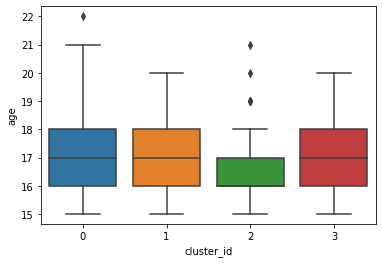

In [106]:
sns.boxplot(data=df, y='age', x='cluster_id')

<AxesSubplot:xlabel='cluster_id', ylabel='traveltime'>

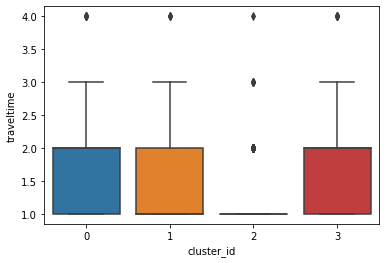

In [107]:
sns.boxplot(data=df, y='traveltime', x='cluster_id')

<AxesSubplot:xlabel='cluster_id', ylabel='count'>

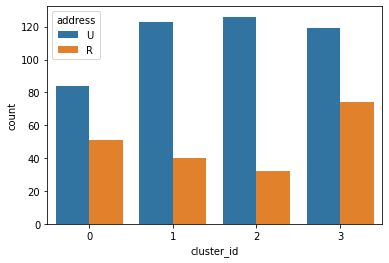

In [108]:
sns.countplot(data=df, x='cluster_id', hue='address')

<AxesSubplot:xlabel='cluster_id', ylabel='count'>

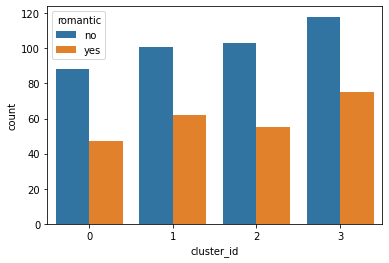

In [111]:
sns.countplot(data=df, x='cluster_id', hue='romantic')

<AxesSubplot:xlabel='cluster_id', ylabel='health'>

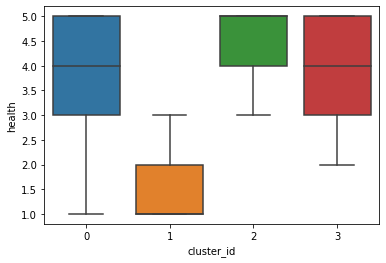

In [112]:
sns.boxplot(data=df, y='health', x='cluster_id')

<AxesSubplot:xlabel='cluster_id', ylabel='G3'>

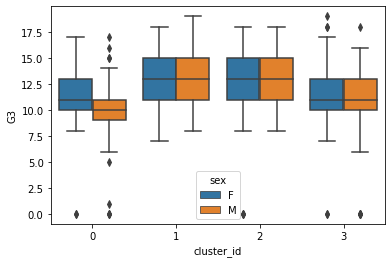

In [121]:
sns.boxplot(data=df, y='G3', x='cluster_id', hue='sex')

<AxesSubplot:xlabel='cluster_id', ylabel='Dalc'>

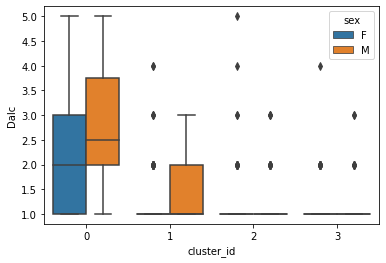

In [122]:
sns.boxplot(data=df, y='Dalc', x='cluster_id', hue='sex')

<AxesSubplot:xlabel='cluster_id', ylabel='Walc'>

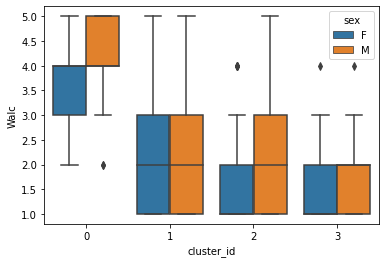

In [123]:
sns.boxplot(data=df, y='Walc', x='cluster_id', hue='sex')

<AxesSubplot:xlabel='cluster_id', ylabel='Dalc'>

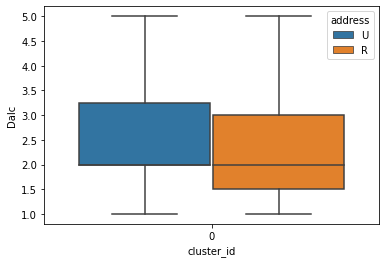

In [127]:
sns.boxplot(data=df.loc[df.cluster_id == 0 ], y='Dalc', x='cluster_id', hue='address')


<AxesSubplot:xlabel='cluster_id', ylabel='Walc'>

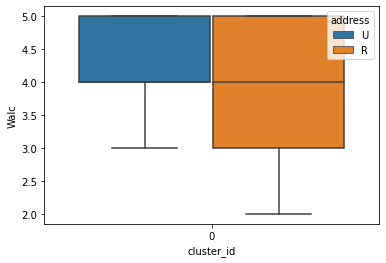

In [128]:
sns.boxplot(data=df.loc[df.cluster_id == 0 ], y='Walc', x='cluster_id', hue='address')


# Zaver

Hlavni body jsem vypsal uz nahore. Vyzkousel jsem si vysledky vizualizovat.
* Muzi v konzumaci alkoholu vedou v nekterych clusterech jsou zase na tom stejne jako zeny (o vikendech).
* Konecne hodnoceni za predmet je mezi muzi a zenami v jednotlivych clusterech skoro stejne az na alkoholicky cluster 0 tam zeny dopadly lepe :D
* V kazdem clusteru prevazujou nezadani lide
* prevladaji studenti z mest zaroven ma cluster 0 nejvice venkovskych studentu.